# Collaboration and Competition

---

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="../Tennis_Linux_NoVis/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, we use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, we will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows us to observe the agents.

Of course, as part of the project, we'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, we can close the environment.

In [7]:
# env.close()

### 4. Training

When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

env = UnityEnvironment(file_name="../Tennis_Linux_NoVis/Tennis.x86_64")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
# print()
# print(states[1])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


/opt/conda/envs/rl/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/envs/rl/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode 1	Average Score: nan	Episode Length: 14
Episode 2	Average Score: 0.00	Episode Length: 13
Episode 3	Average Score: 0.00	Episode Length: 13
Episode 4	Average Score: 0.00	Episode Length: 13
Episode 5	Average Score: 0.00	Episode Length: 13
Episode 6	Average Score: 0.00	Episode Length: 14
Episode 7	Average Score: 0.00	Episode Length: 13
Episode 8	Average Score: 0.00	Episode Length: 27
Episode 9	Average Score: 0.01	Episode Length: 18
Episode 10	Average Score: 0.01	Episode Length: 19
Episode 11	Average Score: 0.01	Episode Length: 19
Episode 12	Average Score: 0.01	Episode Length: 13
Episode 13	Average Score: 0.01	Episode Length: 13
Episode 14	Average Score: 0.01	Episode Length: 14
Episode 15	Average Score: 0.01	Episode Length: 13
Episode 16	Average Score: 0.01	Episode Length: 13
Episode 17	Average Score: 0.01	Episode Length: 13
Episode 18	Average Score: 0.01	Episode Length: 13
Episode 19	Average Score: 0.01	Episode Length: 14
Episode 20	Average Score: 0.01	Episode Length: 13
Episode 21

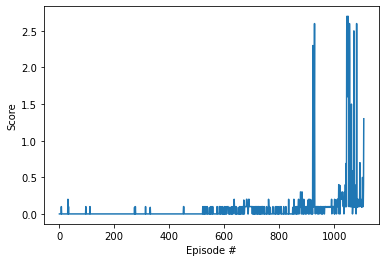

In [2]:
from ddpg_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, random_seed=1)

def ddpg(n_episodes=10000, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        states = env.reset(train_mode=True)[brain_name].vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations      # get the next states
            rewards = env_info.rewards                      # get the rewards
            dones = env_info.local_done                     # see if episodes has finished
            
            # Take a step for each 'agent'
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done)
                
            states = next_states
            score += rewards
            
            if np.any(dones):
                break

        print('Episode {}\tAverage Score: {:.2f}\tEpisode Length: {}'.format(i_episode, np.mean(scores_deque), t))
#         print('scores: ' + str(score) + '\t mean score: ' + str(score.mean()) + '\n') 
        
        scores_deque.append(score.max())
        scores.append(score.max())
        
        if i_episode % print_every == 0:
            print('Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
        if np.mean(scores_deque) > 0.5 and i_episode >= 100:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print()
            print('Environment Solved. Episode{}. Average Score: {:.2f}.'.format(i_episode, np.mean(scores_deque)))
            break
            
    return scores


scores = ddpg(print_every=100)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch Agent

In [ ]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state = env.reset()
for t in range(200):
    action = agent.act(state, add_noise=False)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()

### 6. Learning Algorithm, Network and Hyperparameters

**Learning Algorithm:**

The learning algorithm we used above is Deep Deterministic Policy Gradient (DDPG). In it we use two networks a Critic that learns Q-Values and an Actor that selects (continuous) actions. In addition, just like in Deep Q-Networks we maintain a target network. In this case, we would have a target network for each Critic and Actor. Also, similar to Deep Q-Network we use a Replay Buffer to store experience, which in our case is share between agents. Lastly, we use soft-updates to the target networks.


**Networks:**

The network is an Actor-Critic architecture and hyperparameters used to train are as follows:

- Replay Buffer Size = 1M
- Batch Size = 256
- Optimizer: Adam
- Learning Rate (Actor) = 1 x 10^-4
- Learning Rate (Critic) = 1 x 10^-3
- Tau = 1 x 10^-3
- Gamma = 0.99
- Noise decay rate = 0.9999
- Minimum epsilon value = 0.01
- Update frequency is every 20 steps
- Learning passes every update is 20 times.
- Number of Agents: 10
- Gradient Clipping was used.

**Noise Process:**

I've used a different Ornstein–Uhlenbeck noise process for each agent that is normally distributed with parameters sampled from a uniform distribution where:

- $\mu$ = 0
- $\sigma$ ~ [0.1, 0.30]
- $\theta$ ~ [0.10, 0.20]

**Network:**

**Actor:** MLP
- Input Layer: 33 neurons
- Layer 1: 400 neurons
- Layer 2: 300 neurons
- Output Layer: 4 neurons

**Critic:** MLP
- Input Layer: 37 neurons
- Layer 1: 400 neurons
- Layer 2: 300 neurons
- Output Layer: 1 Neuron

### 7. Future work

- Train agents using MADDPG
- Implement environment training on multiprocessing
- Implement adding noise to the parameters
- Add command line interface
- Try solving the Soccer environment
